# NumPy. Практика

In [1]:
import numpy as np

## Как сдавать



1.   Создаем копию ноутбука и сохраняем к себе на Google Drive
2.   Выполняем задания
3.   Делаем ноутбук доступным для чтения и комментариев
     - в правом верхнем углу кликаем `Share`
     - выбираем Anyone with the link (в `General access`)
     - меняем роль `Viewer` на `Commenter`
     - копируем получившуюся ссылку (`Copy link`) и отправляем на степик


## Упражнения

### Задание 1

Замените столбец 0 и столбец 1 местами

In [7]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")
array[:, [0, 1]] = array[:, [1, 0]]

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [8]:
print(f"Решение \n{array}")

Решение 
[[1 0 2]
 [4 3 5]
 [7 6 8]]


### Задание 2

Замените строку 0 и строку 1 местами

In [9]:
array = np.arange(9).reshape(3, 3)
print(f"Оригинальный \n{array}")

array[[0, 1], :] = array[[1, 0], :]

Оригинальный 
[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [10]:
print(f"Решение \n{array}")

Решение 
[[3 4 5]
 [0 1 2]
 [6 7 8]]


### Задание 3

Перепишите цикл перемножения матриц с использованием NumPy и сравните время выполнения

In [11]:
array1 = [*range(1, 10000001)]
array2 = [*range(10, 100000010, 10)]

# Выполняем умножение элементов массивов
def multiply_vectors(array_1, array_2):
    assert len(array_1) == len(array_2)
    return [array_1[i] * array_2[i] for i in range(len(array_1))]

In [12]:
%%time
result_python = multiply_vectors(array1, array2)

CPU times: total: 2.45 s
Wall time: 3.26 s


In [13]:
array1 = np.arange(1, 10000001)
array2 = np.arange(10, 100000010, 10)

In [15]:
def multiply_vectors_numpy(array_1, array_2):
    return array_1 * array_2

In [16]:
%%time
result_numpy = multiply_vectors_numpy(array1, array2)

CPU times: total: 15.6 ms
Wall time: 34.9 ms


### Задание 4

Перепишите цикл нахождения факториала с использованием NumPy

Подсказка: понадобится `np.prod()`

In [17]:
def factorial(n):
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

In [18]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial(n)

CPU times: total: 5.55 s
Wall time: 10.1 s


In [19]:
def factorial_numpy(n):
    # Создаем массив от 1 до n
    numbers = np.arange(1, n)

    # Вычисляем факториалы с использованием векторизации NumPy
    factorials = np.prod(numbers)

    return factorials

In [20]:
%%time
n_values = [*range(1, 4000)]
for n in n_values:
    result = factorial_numpy(n)

CPU times: total: 46.9 ms
Wall time: 85.7 ms


### Задание 5

Расчет общего сопротивления электрической цепи

Вам дан массив $R$ сопротивлений различных элементов электрической цепи, подключенных последовательно.

Ваша задача - вычислить общее сопротивление цепи с использованием функции einsum.

Формула расчета общего сопротивления

$1/R$ = $1/R_1$ + $1/R_2$ + ... + $1/R_n$

In [22]:
resistance_array = np.array([2, 4, 6, 8, 10, 12])

# ваш код здесь
total_resistance = 1 / np.einsum('i->', 1/resistance_array)

assert total_resistance == 0.816326530612245

### Задание 6

Возведите большой вектор в пятую степень тремя способами с помощью numpy

In [24]:
x = np.random.rand(int(5e7))

In [30]:
%timeit np.power(x, 5)
%timeit np.einsum('i, i, i, i, i -> i', x, x, x, x, x)
%timeit np.prod([x] * 5, axis=0)

2.78 s ± 48.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
591 ms ± 18.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.1 s ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Задание 7

Вычисление Манхэттенского расстояния между двумя точками в сетке

Вы работаете над проектом, связанным с навигацией роботов-курьеров в Манхэттене. Вам нужно написать функцию, которая вычислит Манхэттенское расстояние между двумя точками в сетке.

Манхэттенское расстояние - это сумма абсолютных различий по координатам x и y между двумя точками.

Напишите функцию manhattan_distance(point1, point2), которая принимает на вход две точки point_1 и point_2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Манхэттенское расстояние между этими двумя точками и вернуть его значение.

In [35]:
def manhattan_distance(point_1, point_2):

    # ваш код здесь
    distance = abs(point_1[0] - point_2[0]) + abs(point_1[1] - point_2[1])

    return distance

In [36]:
assert manhattan_distance(np.array([1, 5]), np.array([2, 10])) == 6

In [37]:
assert manhattan_distance(np.array([12, 7]), np.array([34, 10])) == 25

In [38]:
assert manhattan_distance(np.array([1337, 212]), np.array([221, 111])) == 1217

### Задание 8

Поздравляю, вас не уволили и вы продолжаете работать над проектом, связанным с навигацией роботов-курьеров. Но на этот раз вы работаете в Санкт-Петербуре. Вам нужно написать функцию, которая вычислит расстояние Чебышёва между двумя точками в сетке.

Расстояние Чебышёва между двумя точками определяется как максимальная абсолютная разница между их координатами по каждому измерению.

Напишите функцию chebyshev_distance(point1, point2), которая принимает на вход две точки point1 и point2. Каждая точка представляется в виде numpy массива (x, y), где x - координата по горизонтали, а y - координата по вертикали.

Ваша функция должна вычислить Чебышёва расстояние между этими двумя точками и вернуть его значение.

In [39]:
def chebyshev_distance(point1, point2):

    # ваш код здесь
    distance =np.max(np.abs(point1-point2))

    return distance

In [40]:
assert chebyshev_distance(np.array([1, 3]), np.array([2, 10])) == 7

In [41]:
assert chebyshev_distance(np.array([123, 1503]), np.array([332, 552])) == 951

In [42]:
assert chebyshev_distance(np.array([2112, 1998]), np.array([702, 1998])) == 1410

### Задание 9

Вам треуется перевести изображение из rgb в grayscale.

Для того, чтобы перевести изображение в grayscale, надо воспользоваться формулой:

$Y' = 0.299 R + 0.587 G + 0.114 B$

In [49]:
import requests

url = "http://cdn.com.do/wp-content/uploads/2017/02/Donal-Trum-Derogar.jpeg"
response = requests.get(url)

with open("img.jpg", "wb") as f:
    f.write(response.content)


In [47]:
import matplotlib.pyplot as plt

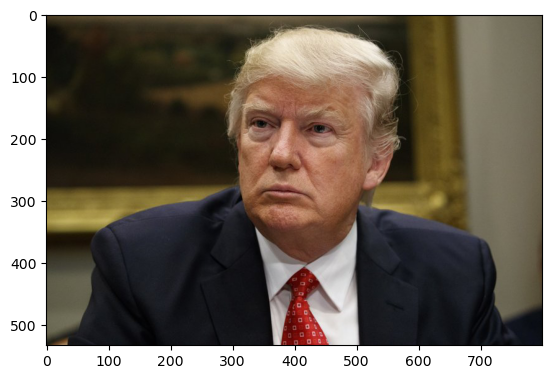

In [50]:
img = plt.imread('img.jpg')
plt.imshow(img)
plt.show()

In [58]:
img.shape

(533, 800, 3)

In [65]:
img[:, :, 0]

(533, 800)

In [66]:
# ваш код здесь
grayscale_img = img[:, :, 0]*0.299 + img[:, :, 1]*0.587 + img[:, :, 2]*0.114
assert grayscale_img.shape == (533, 800)

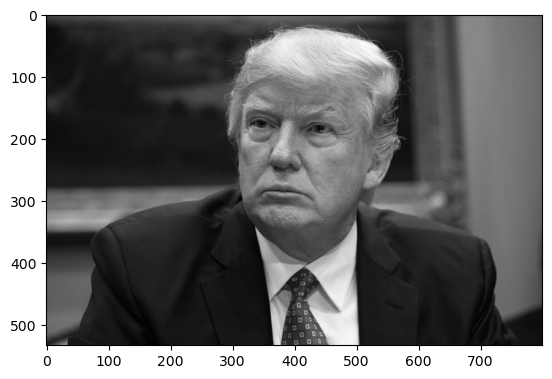

In [67]:
plt.imshow(grayscale_img, cmap = plt.get_cmap(name = 'gray'))
plt.show()

### Задание 10

Вам требуется сделать ресайз изображения в два раза с помощью NumPy.

Хинт: А что если брать каждый второй пиксель?

In [68]:
# ваш код здесь
resised_image = img[::2, ::2]
assert resised_image.shape == (267, 400, 3)

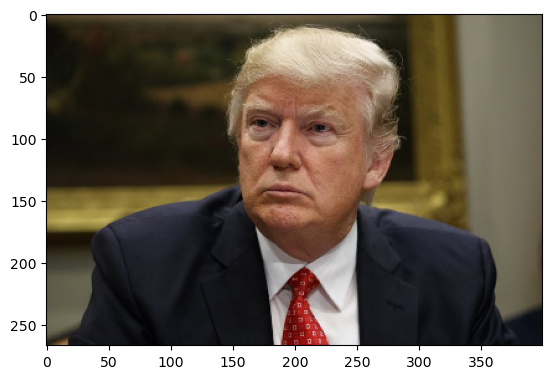

In [69]:
plt.imshow(resised_image)
plt.show()